# Churn de Clientes - Bank Dataset

Dados: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

**Descrição das variáveis**
- RowNumber: Número da linha do dataset
- CustomerId: Número randômico que identifica o cliente
- Surname: Sobrenome do cliente
- CreditScore: Score (pontuação) de crédito do cliente
- Geography: País do cliente
- Gender: Gênero do cliente
- Age: Idade do cliente
- Tenure: Quantidade de anos que o cliente está cadastrado na instituição (Fidelidade do cliente)
- Balance: Saldo da conta
- NumOfProducts: Quantidade de produtos que o cliente possui no banco
- HasCrCard: Se o cliente possui ou não cartão de crédito | (1 - Sim / 0 - Não)
- IsActiveMember: Se o cliente está ativo ou não no banco | (1 - Sim / 0 - Não)
- EstimatedSalary: Salário estimado do cliente
- Exited: Se o cliente encerrou a conta no banco - Variável-alvo | (1 - Sim / 0 - Não)

## 1. Importação das bibliotecas

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# Machine Learning

In [3]:
# Bibliotecas não utilizadas
#! Utilizar ydata_profiling em Jupyter notebook
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension
#
#from ydata_profiling import ProfileReport

#! Pacotes não utilizados no momento
#import plotly.express as px
#import plotly.io as pio
#import chart_studio.plotly as py
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#import ydata_profiling

## 2. Análise Exploratória dos Dados (EDA)

### Conhecendo os dados

In [4]:
# Leitura do dataset original
df_original = pd.read_csv(filepath_or_buffer = 'churn.csv')

In [5]:
# 5 primeiros registros
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Informações sobre as features
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Tratamento do dataset

#### Exclusão de colunas não utilizadas

In [7]:
# Excluir colunas que não serão utilizadas
trash_colunas = {'RowNumber', 'CustomerId', 'Surname'}
# Criando um novo dataframe para os tratamentos
df = df_original.drop(columns = trash_colunas)
# Deleta dicionário com nomes das colunas deletadas
del(trash_colunas)
# 5 primeiras linhas
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Criar dicionário com nome das novas variáveis
novos_nomes = {
    'CreditScore': 'Score', 'Geography': 'Pais', 'Gender': 'Genero', 'Age': 'Idade',
    'Tenure': 'Fidelidade', 'Balance': 'Saldo', 'NumOfProducts': 'QtdProdutos',
    'HasCrCard': 'TemCartao', 'IsActiveMember': 'ClienteAtivo', 
    'EstimatedSalary': 'Renda', 'Exited': 'Churn'
    }
# renomeando as variáveis
df.rename(columns = novos_nomes, inplace = True)
# Deleta dicionário com nome das novas variáveis
del(novos_nomes)
# Mostra o nome das colunas do dataset
df.columns

Index(['Score', 'Pais', 'Genero', 'Idade', 'Fidelidade', 'Saldo',
       'QtdProdutos', 'TemCartao', 'ClienteAtivo', 'Renda', 'Churn'],
      dtype='object')

In [9]:
#Informações sobre as features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Score         10000 non-null  int64  
 1   Pais          10000 non-null  object 
 2   Genero        10000 non-null  object 
 3   Idade         10000 non-null  int64  
 4   Fidelidade    10000 non-null  int64  
 5   Saldo         10000 non-null  float64
 6   QtdProdutos   10000 non-null  int64  
 7   TemCartao     10000 non-null  int64  
 8   ClienteAtivo  10000 non-null  int64  
 9   Renda         10000 non-null  float64
 10  Churn         10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Verifica a quantidade de registros únicos em cada variável

In [10]:
#Criar lista com o nome das colunas (variáveis)
variaveis = df.columns.to_list()
#Mostrar a quantidade de registros únicos em cada variável
df[variaveis].nunique()

Score            460
Pais               3
Genero             2
Idade             70
Fidelidade        11
Saldo           6382
QtdProdutos        4
TemCartao          2
ClienteAtivo       2
Renda           9999
Churn              2
dtype: int64

#### Substituição (tradução) de conteúdo de variáveis

##### País

In [11]:
# Verifica registros únicos da variável País
df['Pais'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
# Alterando o nome dos países
df['Pais'].replace({'France' : 'França', 'Spain': 'Espanha', 'Germany': 'Alemanha'}, inplace = True)
df['Pais'].unique()

array(['França', 'Espanha', 'Alemanha'], dtype=object)

##### Gênero

In [13]:
# Verifica registros únicos da variável Gênero
df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# Alterando o nome dos gêneros
df['Genero'].replace({'Male' : 'Masculino', 'Female': 'Feminino'}, inplace = True)
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

### Classificação das variáveis

In [15]:
# Listar variáveis quantitativa contínuas
var_quantitativas_continuas = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'float64' and variavel not in 'Churn']
# Mostrar informaçõs estatísticas das variáveis quantitativas contínuas
df[var_quantitativas_continuas].describe().T

,count,mean,std,min,25%,50%,75%,max
Saldo,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Renda,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [16]:
# Listar variáveis quantitativa discretas
var_quantitativas_discretas = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'int64' and df[variavel].nunique() > 2 and variavel not in 'Churn']
# Mostrar informaçõs estatísticas das variáveis quantitativas discretas
df[var_quantitativas_discretas].describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Idade,10000.0,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Fidelidade,10000.0,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
QtdProdutos,10000.0,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [17]:
# Listar variáveis qualitativas nominais
var_qualitativas_nominais = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'object' and variavel not in 'Churn']
# Mostrar informaçõs estatísticas das variáveis qualitativas nominais
df[var_qualitativas_nominais].describe().T

,count,unique,top,freq
Pais,10000,3,França,5014
Genero,10000,2,Masculino,5457


In [18]:
# Listar variáveis qualitativas ordinais
var_qualitativas_ordinais = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'int64' and df[variavel].nunique() == 2 and variavel not in 'Churn']
# Mostrar informaçõs estatísticas das variáveis qualitativas ordinais
df[var_qualitativas_ordinais].describe().T

,count,mean,std,min,25%,50%,75%,max
TemCartao,10000.0,0.7055,0.455840,0.0,0.0,1.0,1.0,1.0
ClienteAtivo,10000.0,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


In [19]:
# Imprimindo lista de variáveis
print(f'Variáveis Quantitativas Contínuas: {var_quantitativas_continuas}', end = '\n')
print(f'Variáveis Quantitativas Discretas: {var_quantitativas_discretas}', end = '\n')
print(f'Variáveis Qualitativas Nominais: {var_qualitativas_nominais}', end = '\n')
print(f'Variáveis Qualitativas Ordinais: {var_qualitativas_ordinais}', end = '\n')

Variáveis Quantitativas Contínuas: ['Saldo', 'Renda']
Variáveis Quantitativas Discretas: ['Score', 'Idade', 'Fidelidade', 'QtdProdutos']
Variáveis Qualitativas Nominais: ['Pais', 'Genero']
Variáveis Qualitativas Ordinais: ['TemCartao', 'ClienteAtivo']


In [20]:
# Separar listas de variáveis por tipo
variaveis_numericas = var_quantitativas_continuas + var_quantitativas_discretas
variaveis_categoricas = var_qualitativas_nominais + var_qualitativas_ordinais

### Análise univariada

#### Definição do tema dos gráficos

In [21]:
# Definição do Tema do Seaborn
sns.set_theme(
    context = 'paper', style = 'darkgrid', palette = 'colorblind',
    font = 'sans-serif', font_scale = 1, color_codes = True, 
    rc = None)

#### Criação de gráficos - Variáveis numéricas

1. Saldo -----

Estatísticas descritivas
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Saldo, dtype: float64


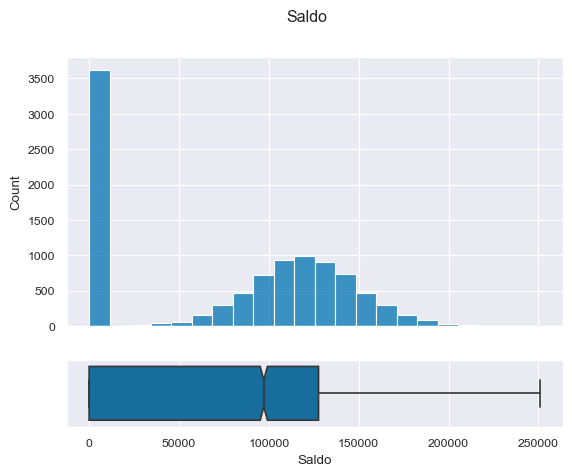

2. Renda -----

Estatísticas descritivas
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Renda, dtype: float64


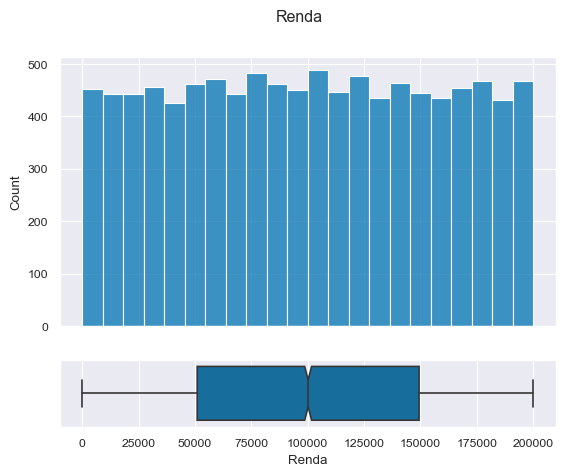

3. Score -----

Estatísticas descritivas
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Score, dtype: float64


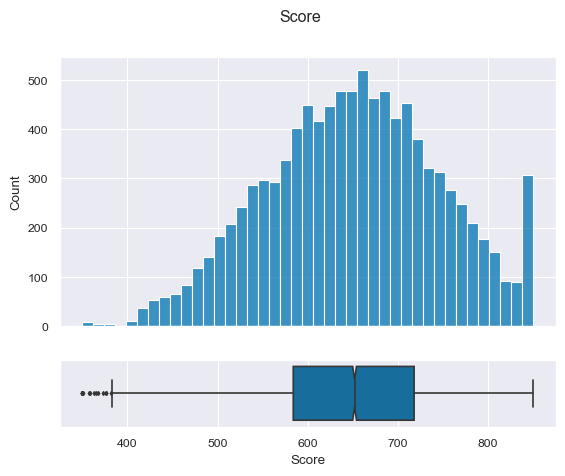

4. Idade -----

Estatísticas descritivas
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Idade, dtype: float64


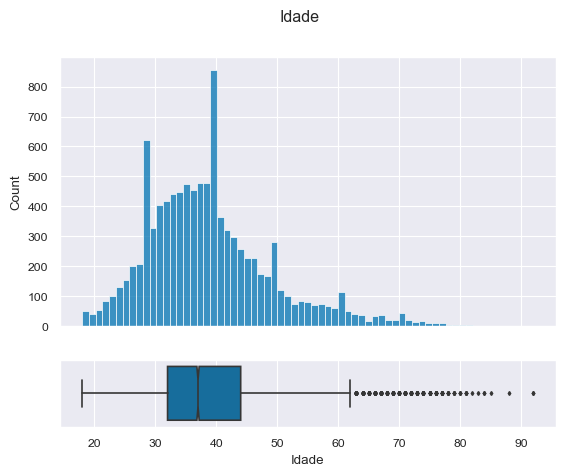

5. Fidelidade -----

Estatísticas descritivas
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Fidelidade, dtype: float64


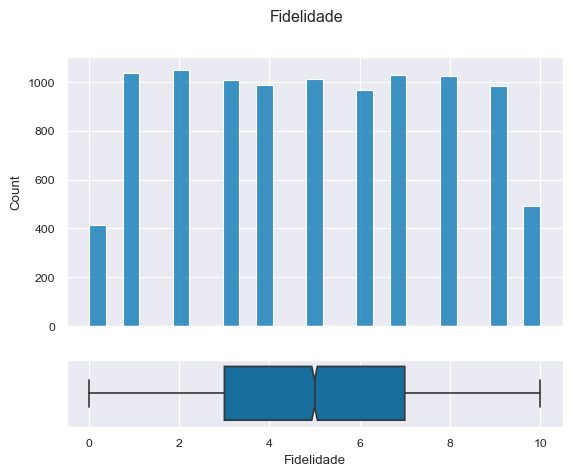

6. QtdProdutos -----

Estatísticas descritivas
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: QtdProdutos, dtype: float64


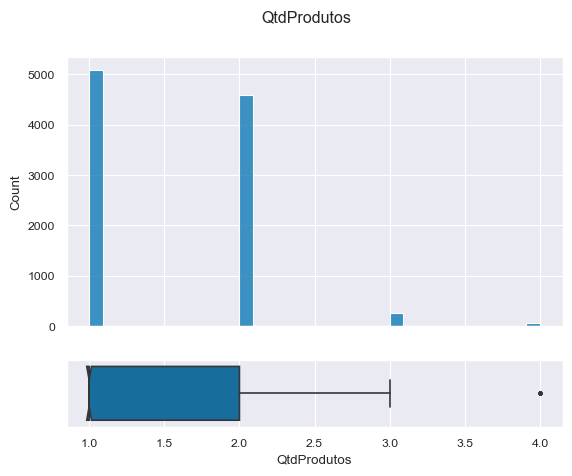

In [22]:
# Geração de gráficos (function)
for n, var, in enumerate(variaveis_numericas, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var} -----', end = '\n''\n')
    print('Estatísticas descritivas', end = '\n')
    print(df[var].describe())
    # Criação dos subplots
    fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex = True, height_ratios = [0.8, 0.2])
    # Título do gráfico 
    fig.suptitle(f'{var}')
    # Gráfico 1 - Histograma
    sns.histplot(data = df, x = var, kde = False, ax = axs[0], stat = 'count', cumulative = False)
    # Gráfico 2 - Boxplot
    sns.boxplot(data = df, x = var, fliersize = 2, notch = True, ax = axs[1])
    #Mostra o gráfico
    plt.show()
    # plt.xlim([df[var].min() - 1, df[var].max() + 1])
    # plt.xticks(range(df[var].max() + 1))

#### Criação de gráficos - Qualitativas Nominais

1. Pais
------------------------
Estatística descritiva
------------------------
França      5014
Alemanha    2509
Espanha     2477
Name: Pais, dtype: int64



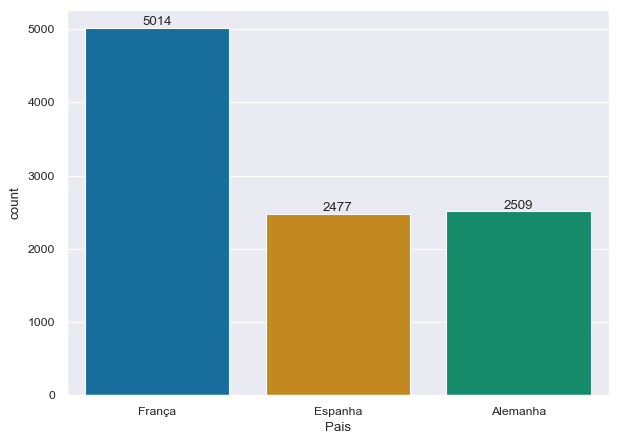

2. Genero
------------------------
Estatística descritiva
------------------------
Masculino    5457
Feminino     4543
Name: Genero, dtype: int64



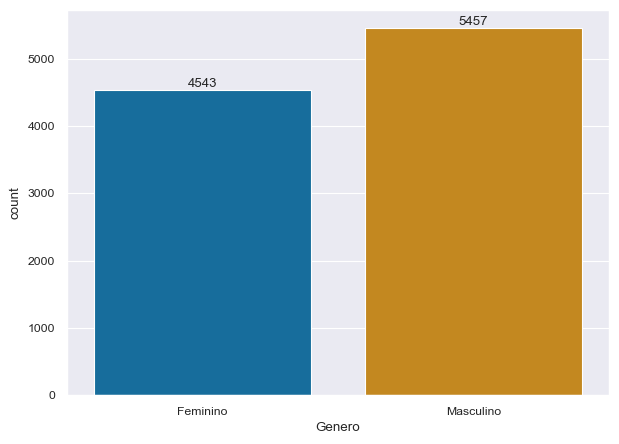

3. TemCartao
------------------------
Estatística descritiva
------------------------
1    7055
0    2945
Name: TemCartao, dtype: int64



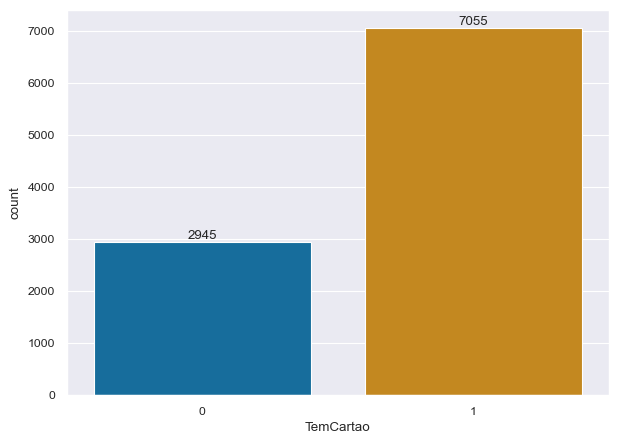

4. ClienteAtivo
------------------------
Estatística descritiva
------------------------
1    5151
0    4849
Name: ClienteAtivo, dtype: int64



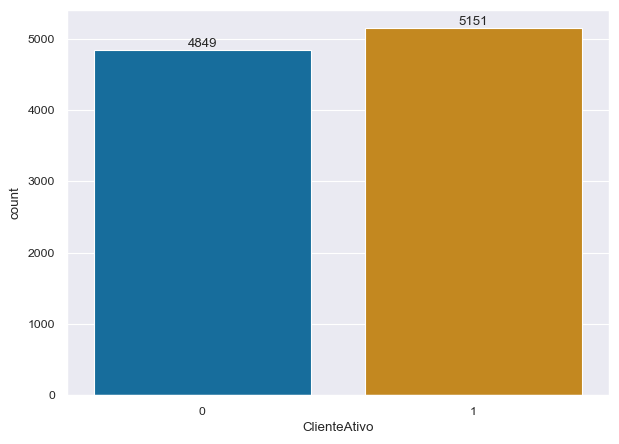

In [23]:
# Geração de gráficos (function)
for n, var, in enumerate(variaveis_categoricas, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var}', end = '\n')
    print('------------------------', end = '\n')
    print('Estatística descritiva', end = '\n')
    print('------------------------', end = '\n')
    print(df[var].value_counts(), end = '\n''\n')
    # Criação dos subplots
    fig = plt.subplots(figsize = (7, 5))
    # Gráfico - Countplot
    ax = sns.countplot(data = df, x = var)
    #Inclusão dos rótulos
    ax.bar_label(ax.containers[0])
    # Título do gráfico 
    #ax.set_title(f'{var}', fontsize = 12)
    #Mostra o gráfico
    plt.show()


### Análise multivariada

In [24]:
variaveis_numericas

['Saldo', 'Renda', 'Score', 'Idade', 'Fidelidade', 'QtdProdutos']

In [25]:
variaveis_categoricas

['Pais', 'Genero', 'TemCartao', 'ClienteAtivo']

<AxesSubplot: xlabel='Saldo', ylabel='Pais'>

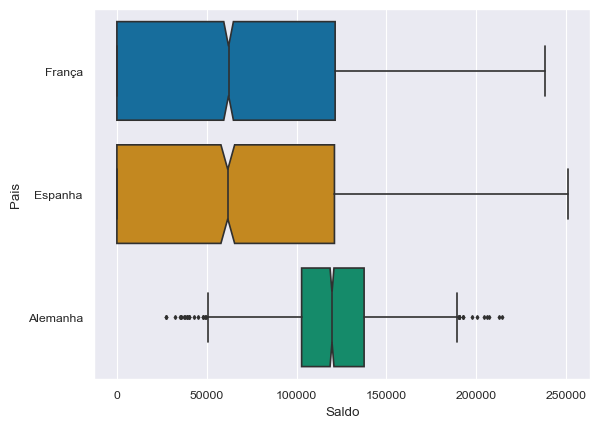

In [26]:
sns.boxplot(data = df, x = df['Saldo'], y = df['Pais'], fliersize = 2, notch = True)

<AxesSubplot: xlabel='Renda', ylabel='Pais'>

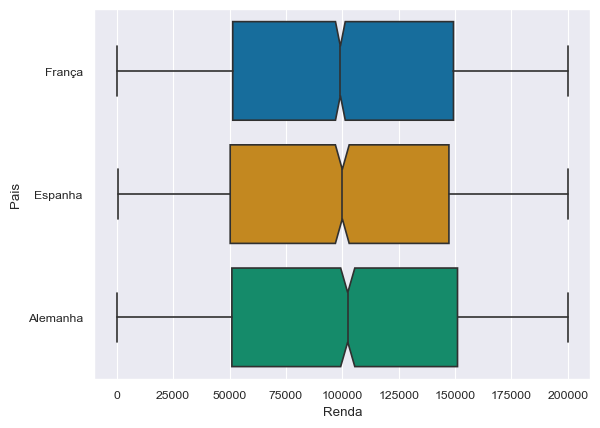

In [27]:
sns.boxplot(data = df, x = df['Renda'], y = df['Pais'], fliersize = 2, notch = True)

<AxesSubplot: xlabel='Score', ylabel='Pais'>

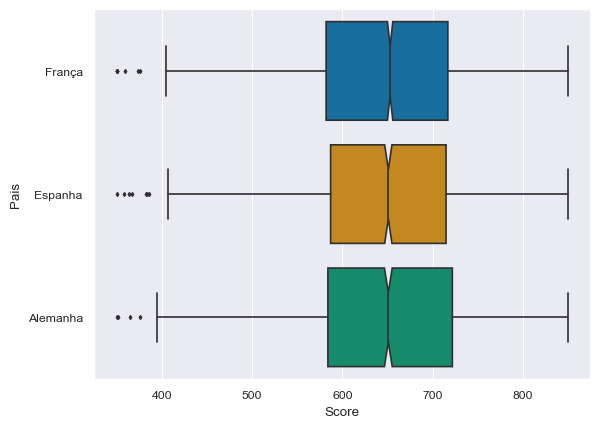

In [28]:
sns.boxplot(data = df, x = df['Score'], y = df['Pais'], fliersize = 2, notch = True)

<AxesSubplot: xlabel='Idade', ylabel='Pais'>

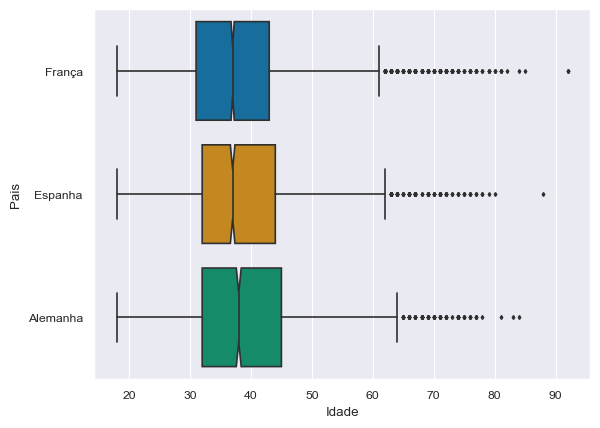

In [29]:
sns.boxplot(data = df, x = df['Idade'], y = df['Pais'], fliersize = 2, notch = True)

<AxesSubplot: xlabel='Fidelidade', ylabel='Pais'>

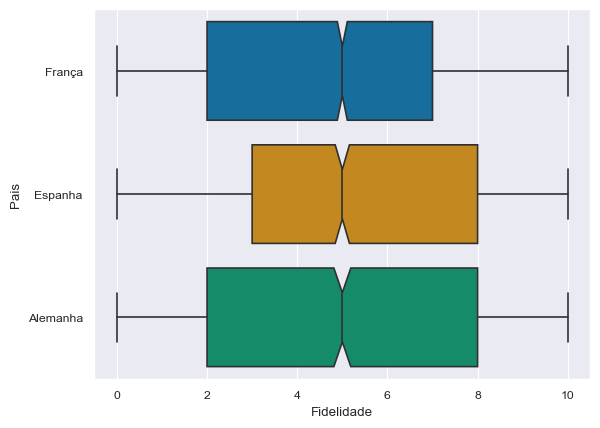

In [30]:
sns.boxplot(data = df, x = df['Fidelidade'], y = df['Pais'], fliersize = 2, notch = True)

<AxesSubplot: xlabel='Pais', ylabel='QtdProdutos'>

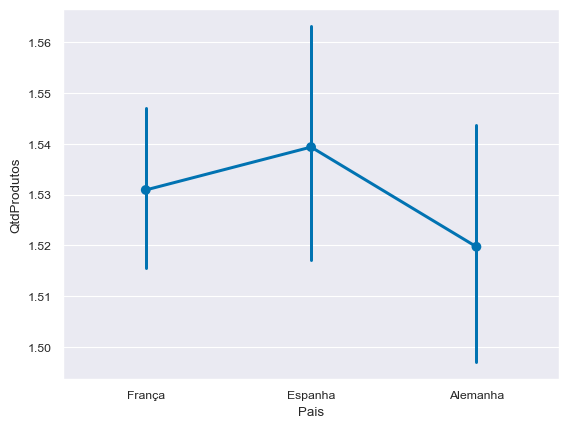

In [31]:
#sns.boxplot(data = df, x = df['QtdProdutos'], y = df['Pais'], fliersize = 2, notch = True)
sns.pointplot(data = df, y = df['QtdProdutos'], x = df['Pais'])

In [ ]:
g = sns.PairGrid(df, diag_sharey = False, corner = True)
g.map(sns.scatterplot)

In [ ]:
def plotar_graficos(df):
    for coluna in df.columns:
        tipo_variavel = df[coluna].dtype

        if tipo_variavel == 'number':
            print(f'{coluna}')
        else:
            print(f'ioahdfiuhdfu {coluna}')

plotar_graficos(df)

#### Matriz de Correlação

In [ ]:
#Matriz de correlação
corr = df.corr()
corr

In [ ]:
#Criação da máscara a ser utilizada no heatmap de correlação
mask = np.triu(np.ones_like(corr, dtype = bool))
#Configuração da paleta de divergência
paleta_divergencia = sns.diverging_palette(h_neg = 250, h_pos = 20, s = 75, l = 50, sep = 1, n = 6, center = 'light', as_cmap = False)
paleta_divergencia

In [ ]:
#Criação do gráfico da matriz de correlação
f, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(corr, mask = mask, cmap = paleta_divergencia, linewidths= 0.4, cbar=True, annot = True)
plt.title('Matriz de Correlação')

In [ ]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por tempo de fidelidade do cliente')
#Gráfico 1 - Histograma
sns.histplot(x = df['Fidelidade'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
#* Defição dos limites do eixo X
plt.xlim([df['Fidelidade'].min() - 1, df['Fidelidade'].max() + 1])
#* Defição da quantidade de ticks
plt.xticks(range(df['Fidelidade'].max() + 1))
#
sns.boxplot(x = df['Fidelidade'], fliersize = 2, whis = 1, notch = True, ax = axs[1])

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Saldo), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Saldo, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Saldo', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [-10000, 300000])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.QtdProdutos), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.QtdProdutos, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Quantidade de Produtos', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [0, 5])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Fidelidade), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Fidelidade, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Tempo de fidelidade (em anos)', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [-5, 15])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Score), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Score, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Score de Crédito', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [300, 900])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Idade), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Idade, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Idade', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [0, 100])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# Definição do template dos gráficos
# pio.templates.default = 'seaborn'

In [ ]:
#Definição do estilo dos gráficos
# plt.style.use('seaborn-v0_8')
# pio.templates

In [ ]:
# #Criação de perfil para geração de relatório Profiling
# profile = ProfileReport(df, title = 'Bank Churn')
# #Funções para utilização do pacote ydata_profiling em Jupyter
# profile.to_widgets()
# profile.to_notebook_iframe()

In [ ]:
# #Salvando o relatório em html
# profile.to_file('churn_Profile.html')

In [32]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [33]:
df.columns

Index(['Score', 'Pais', 'Genero', 'Idade', 'Fidelidade', 'Saldo',
       'QtdProdutos', 'TemCartao', 'ClienteAtivo', 'Renda', 'Churn'],
      dtype='object')

In [34]:
df.head()

,Score,Pais,Genero,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
0,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.head().sort_values(by = 'Idade', ascending = False)

,Score,Pais,Genero,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
4,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0
0,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
2,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
1,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
3,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0


In [41]:
df['Score'].head()

0    619
1    608
2    502
3    699
4    850
Name: Score, dtype: int64

In [42]:
df[0:3]

,Score,Pais,Genero,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
0,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1


In [48]:
df.loc[ 0:5, ['Pais', 'Saldo']]

,Pais,Saldo
0,França,0.00
1,Espanha,83807.86
2,França,159660.80
3,França,0.00
4,Espanha,125510.82
5,Espanha,113755.78


In [50]:
df.iloc[0]

Score                 619
Pais               França
Genero           Feminino
Idade                  42
Fidelidade              2
Saldo                 0.0
QtdProdutos             1
TemCartao               1
ClienteAtivo            1
Renda           101348.88
Churn                   1
Name: 0, dtype: object

In [53]:
df.iloc[1, 1]

'Espanha'